In [8]:
import pandas as pd
df = pd.read_excel(r'D:\\Etda_works\\Life_Expectancy_Data.xlsx', sheet_name = 'Life_Expectancy_Data')
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(       Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Popula

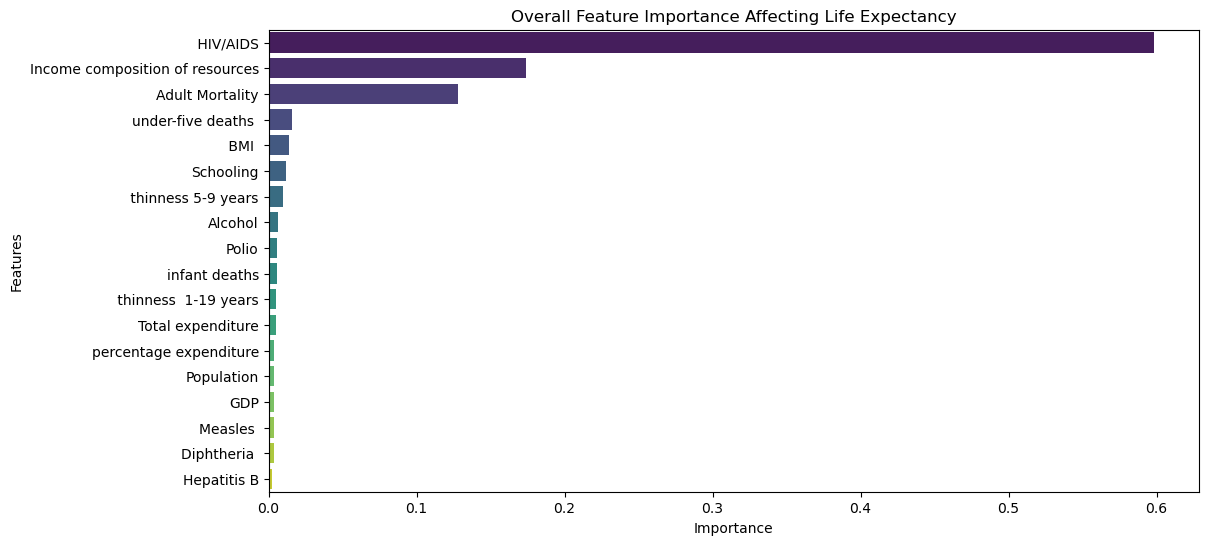

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df[df['Life expectancy '].notnull()]

X = df.drop(columns=['Country', 'Year', 'Life expectancy ', 'Status'])
y = df['Life expectancy ']

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

feature_importance = model.feature_importances_
features = X.columns

sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = features[sorted_indices]
sorted_importance = feature_importance[sorted_indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_importance, y=sorted_features, hue=sorted_features, dodge=False, palette='viridis', legend=False)
plt.title("Overall Feature Importance Affecting Life Expectancy")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

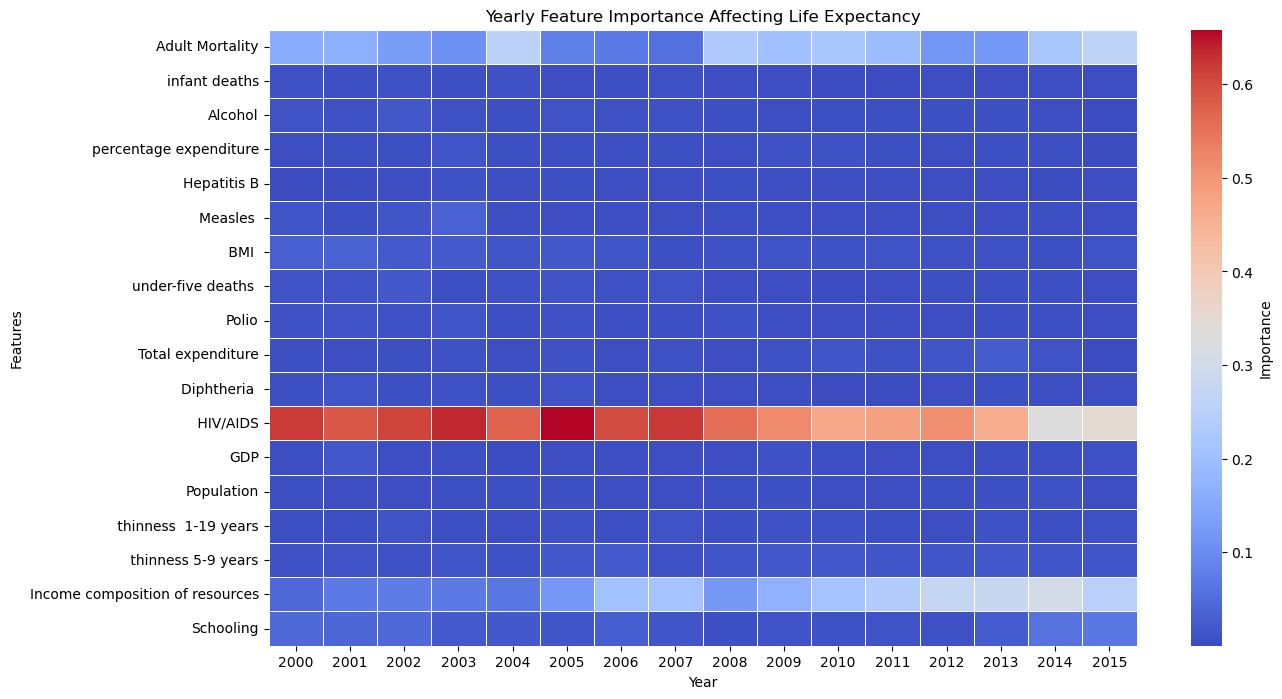

In [22]:
years = np.sort(df['Year'].unique())
yearly_feature_importance = {}

for year in years:
    yearly_data = df[df['Year'] == year]
    X_year = yearly_data.drop(columns=['Country', 'Year', 'Life expectancy ', 'Status'])
    y_year = yearly_data['Life expectancy ']

    X_year_imputed = imputer.transform(X_year)
    X_year_scaled = scaler.transform(X_year_imputed)

    model.fit(X_year_scaled, y_year)
    yearly_feature_importance[year] = model.feature_importances_

importance_df = pd.DataFrame.from_dict(yearly_feature_importance, orient='index', columns=features)

plt.figure(figsize=(14, 8))
sns.heatmap(importance_df.T, cmap='coolwarm', annot=False, cbar_kws={'label': 'Importance'}, linewidths=0.5)
plt.title("Yearly Feature Importance Affecting Life Expectancy")
plt.xlabel("Year")
plt.ylabel("Features")
plt.show()

In [32]:
!pip install prettytable

In [33]:
from prettytable import PrettyTable

df['Country_Year'] = df['Country'] + ' (' + df['Year'].astype(str) + ')'

top_10_life_expectancy = df[['Country_Year', 'Life expectancy ']].nlargest(10, 'Life expectancy ')

table = PrettyTable()
table.field_names = ["Rank", "Country (Year)", "Life Expectancy"]

for i, row in enumerate(top_10_life_expectancy.itertuples(), start=1):
    table.add_row([i, row.Country_Year, round(row._2, 2)])  # '_2' refers to the 'Life expectancy ' column

print(table)

+------+--------------------+-----------------+
| Rank |   Country (Year)   | Life Expectancy |
+------+--------------------+-----------------+
|  1   |   Belgium (2014)   |       89.0      |
|  2   |   Finland (2014)   |       89.0      |
|  3   |   France (2008)    |       89.0      |
|  4   |   France (2007)    |       89.0      |
|  5   |   Germany (2014)   |       89.0      |
|  6   |    Italy (2004)    |       89.0      |
|  7   | New Zealand (2010) |       89.0      |
|  8   |   Norway (2009)    |       89.0      |
|  9   |  Portugal (2014)   |       89.0      |
|  10  |    Spain (2007)    |       89.0      |
+------+--------------------+-----------------+


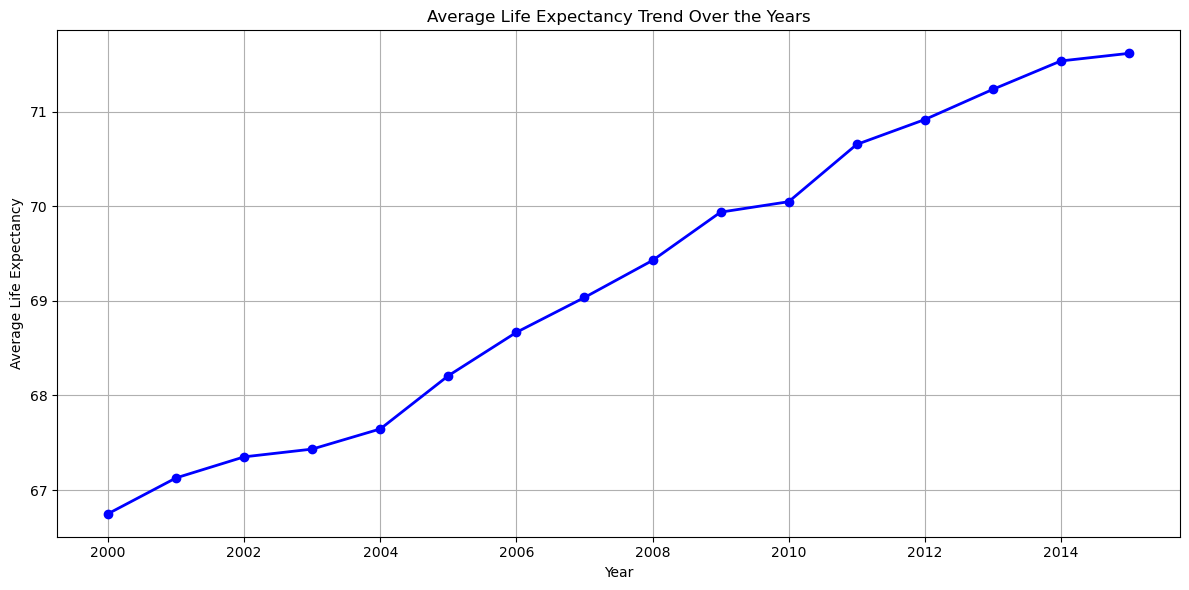

In [36]:
avg_life_expectancy_per_year = df.groupby('Year')['Life expectancy '].mean()

plt.figure(figsize=(12, 6))
plt.plot(avg_life_expectancy_per_year.index, avg_life_expectancy_per_year.values, marker='o', color='b', linestyle='-', linewidth=2)

plt.title('Average Life Expectancy Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.tight_layout()
plt.show()